In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [155]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [66]:
%matplotlib inline

In [67]:
df = sm.datasets.macrodata.load_pandas().data

In [68]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [69]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [70]:
idx = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [71]:
df.index = idx

In [72]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0.5, 0, 'Year')

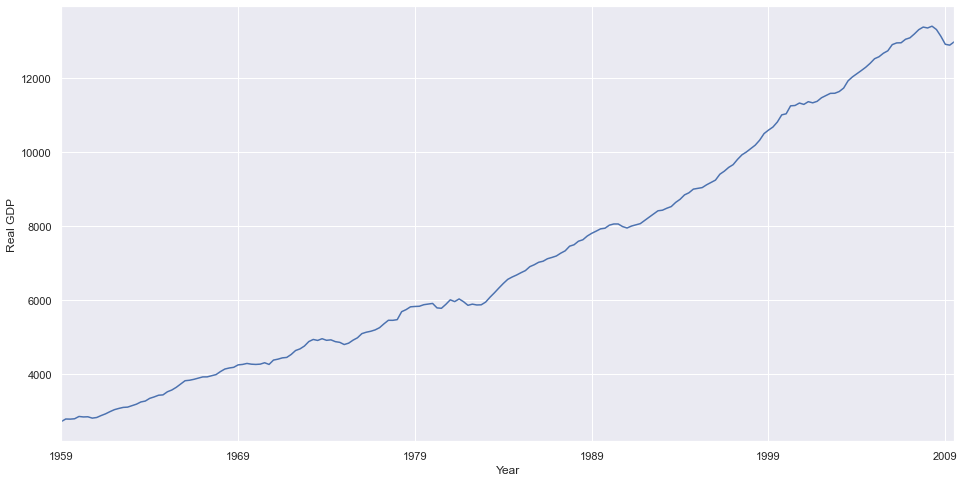

In [94]:
df['realgdp'].plot(figsize=(16,8))
plt.ylabel('Real GDP')
plt.xlabel('Year')

In [74]:
gdp_cycle,gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [75]:
df['Trend'] = gdp_trend

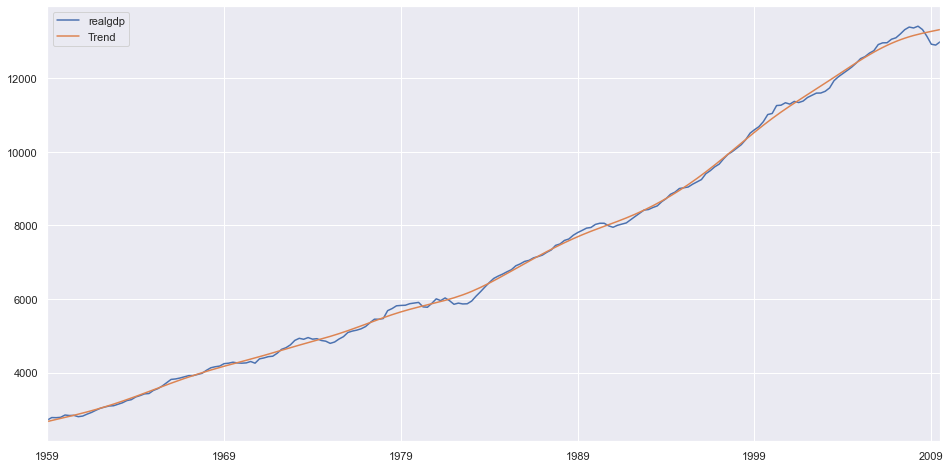

In [92]:
df[['realgdp', 'Trend']].plot(figsize=(16,8))

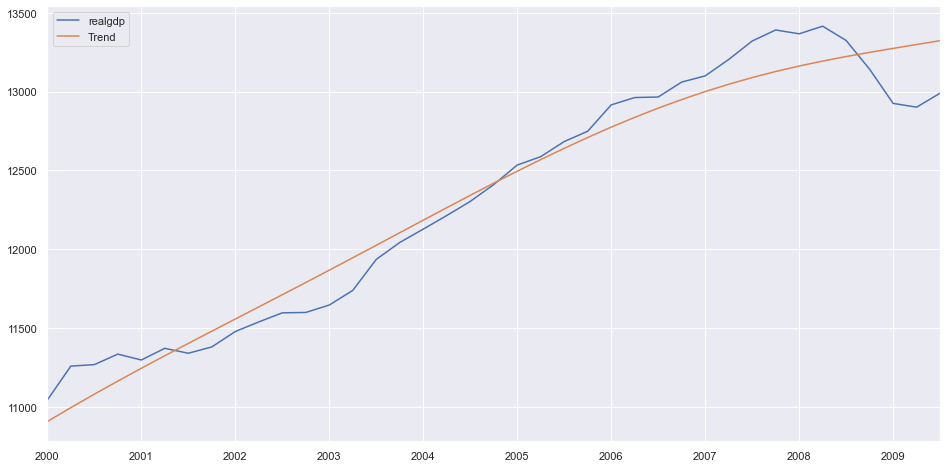

In [91]:
df[['realgdp', 'Trend']]['2000-03-31':].plot(figsize=(16,8))

# SMA

In [83]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [84]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [85]:
airline.dropna(inplace=True)

In [86]:
airline

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [87]:
airline['6 Months SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12 Months SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [89]:
airline.head()

,Thousands of Passengers,6 Months SMA,12 Months SMA
Month,,,
1949-01,112.0,NaN,NaN
1949-02,118.0,NaN,NaN
1949-03,132.0,NaN,NaN
1949-04,129.0,NaN,NaN
1949-05,121.0,NaN,NaN


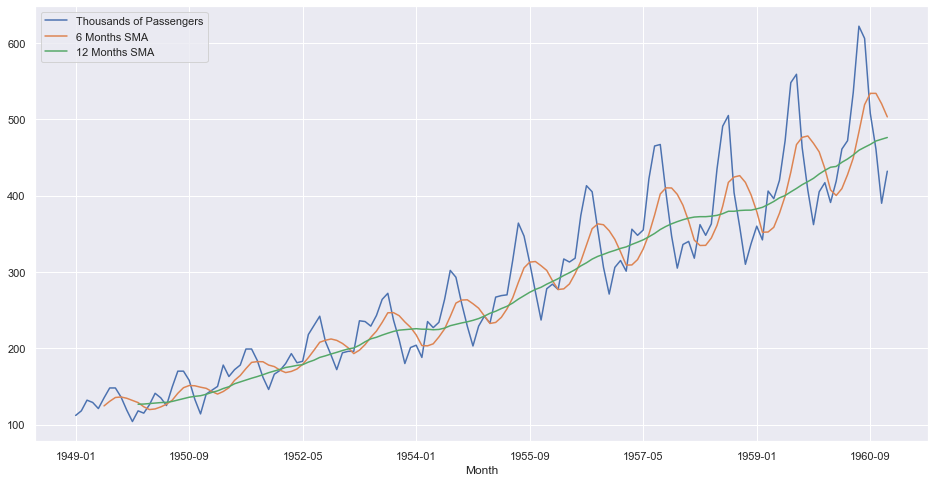

In [90]:
airline.plot(figsize=(16,8))

# EWMA
## Exponentially-weighted moving average 

We just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

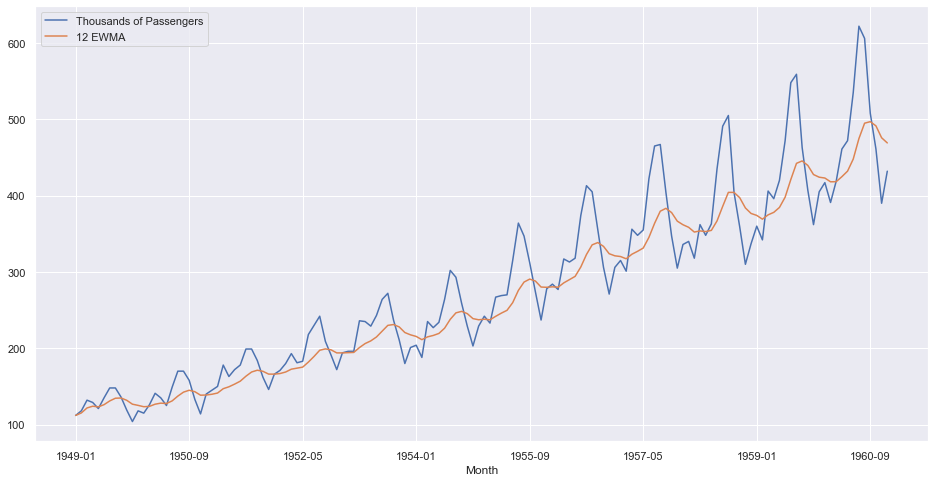

In [98]:
airline['12 EWMA'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', '12 EWMA']].plot(figsize=(16,8))

# ETS Decomposition
## Error - Trend - Seasonality

In [99]:
airline.index = pd.to_datetime(airline.index)

In [100]:
airline.head()

,Thousands of Passengers,6 Months SMA,12 Months SMA,6 EWMA,12 EWMA
Month,,,,,
1949-01-01,112.0,NaN,NaN,112.000000,112.000000
1949-02-01,118.0,NaN,NaN,115.500000,115.250000
1949-03-01,132.0,NaN,NaN,122.917431,121.787529
1949-04-01,129.0,NaN,NaN,125.266892,124.064224
1949-05-01,121.0,NaN,NaN,123.769332,123.231685


In [107]:
airline.drop('12 EWMA', axis=1, inplace=True)

In [108]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Figure size 432x288 with 0 Axes>

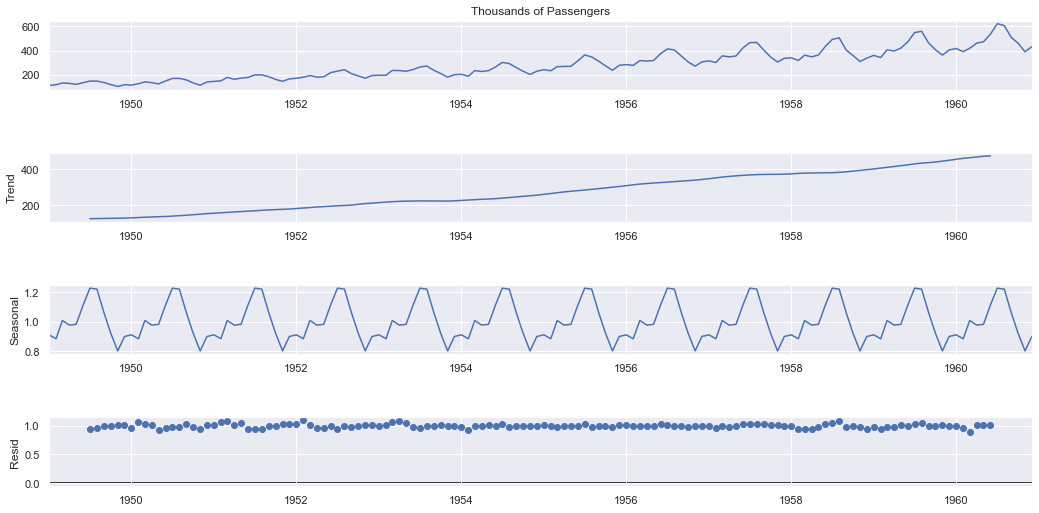

In [140]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,8)

# ARIMA and Seasonal ARIMA

* Step 1: Get the data

In [122]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [117]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [118]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


* Step 2: Clean the data

In [123]:
df.columns = ['Month','Milk in pounds per cow']
df.drop(168,axis=0,inplace=True)
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [124]:
df['Month'] = pd.to_datetime(df['Month'])

In [128]:
df.index = df['Month']

In [130]:
df.drop('Month', axis=1, inplace=True)

In [131]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [135]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


* Step 3: Visualize the Data

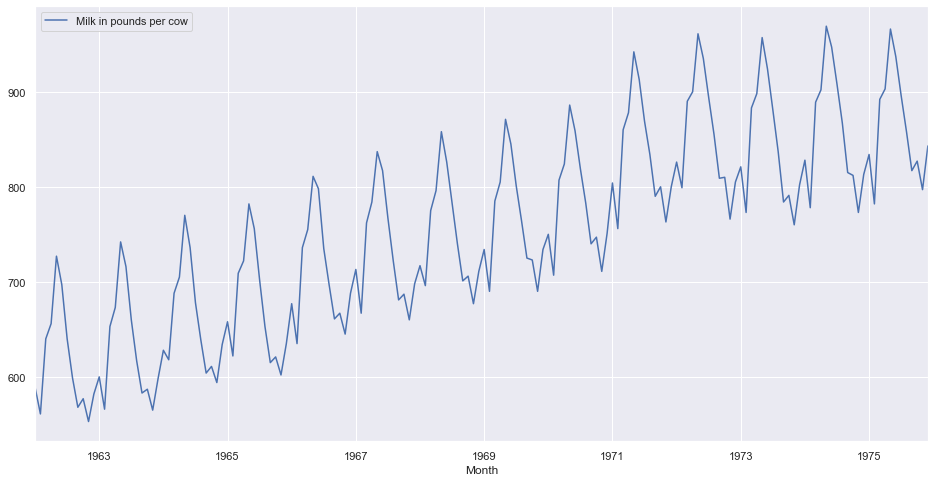

In [136]:
df.plot(figsize=(16,8))

In [137]:
timeseries = df['Milk in pounds per cow']

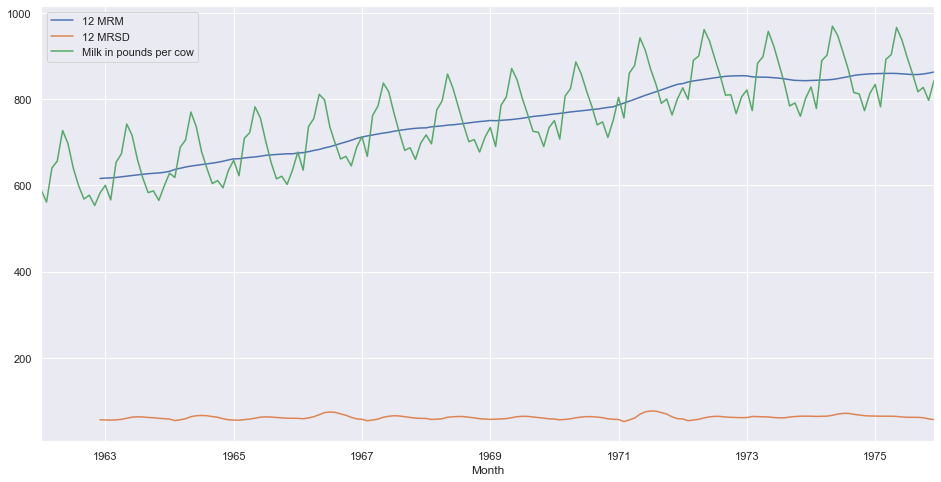

In [138]:
timeseries.rolling(12).mean().plot(label='12 MRM')
timeseries.rolling(12).std().plot(label='12 MRSD')
timeseries.plot(figsize=(16,8))
plt.legend(loc=0)

Decomposition

<Figure size 432x288 with 0 Axes>

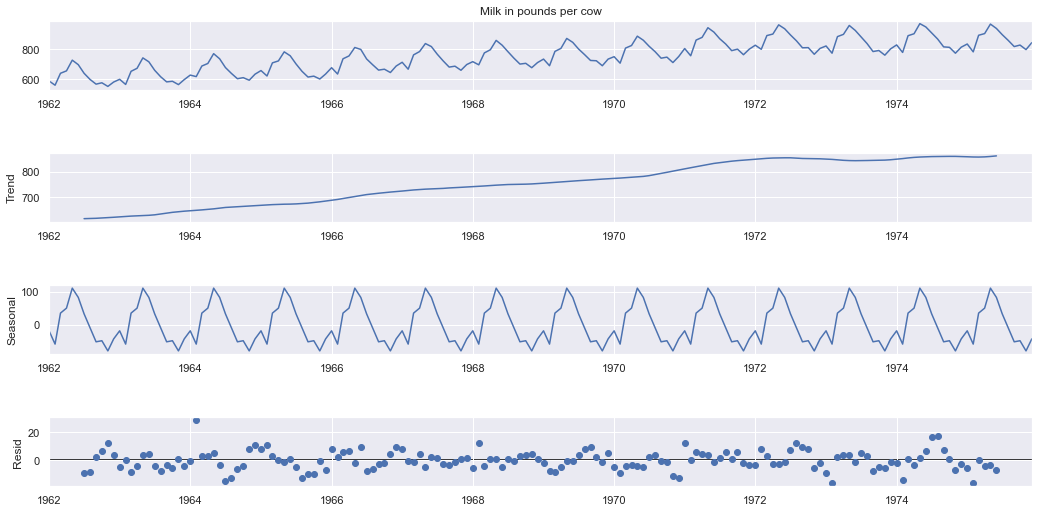

In [139]:
decompose = seasonal_decompose(df['Milk in pounds per cow'], freq=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(16,8)

In [142]:
result_adf = adfuller(df['Milk in pounds per cow'])

In [145]:
print('Augmented Ducky-Fulluer Test:')
labels = ['ADF Test Statistic','p-value','# Lags Used','Number of Observations Used']

for value,label in zip(result_adf,labels):
    print(label+' : '+str(value))
    
if result_adf[1] <= 0.05:
    print("Strong Evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak Evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Ducky-Fulluer Test:
ADF Test Statistic : -1.3038115874221312
p-value : 0.6274267086030308
# Lags Used : 13
Number of Observations Used : 154
Weak Evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [147]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## Differencing 
* Step 4: Find the suitable difference to set the data stationary

First Difference

In [146]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [149]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530615
p-value : 0.03006800400178639
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


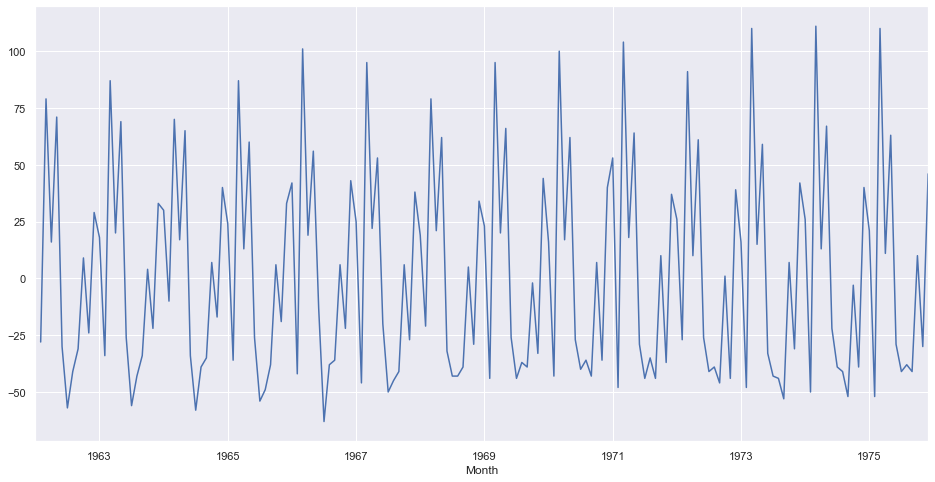

In [150]:
df['Milk First Difference'].plot(figsize=(16,8))

## Seasonal Difference

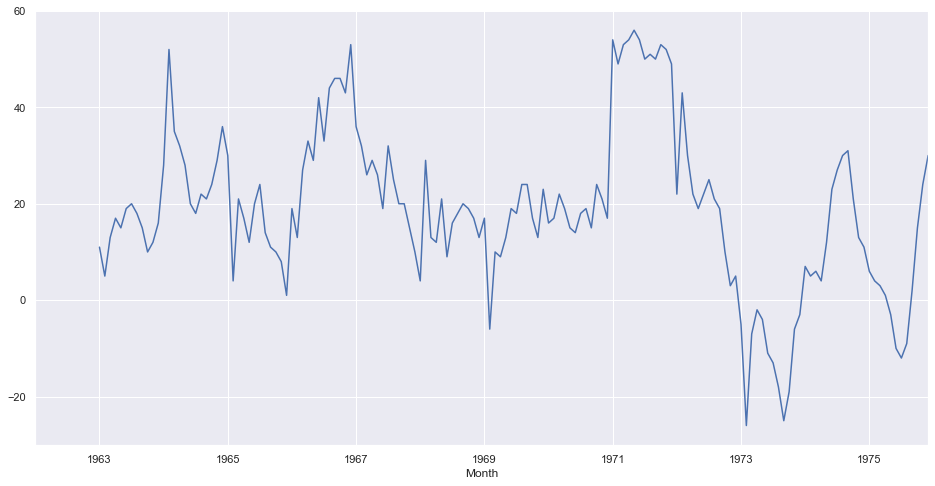

In [151]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot(figsize=(16,8))

In [152]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


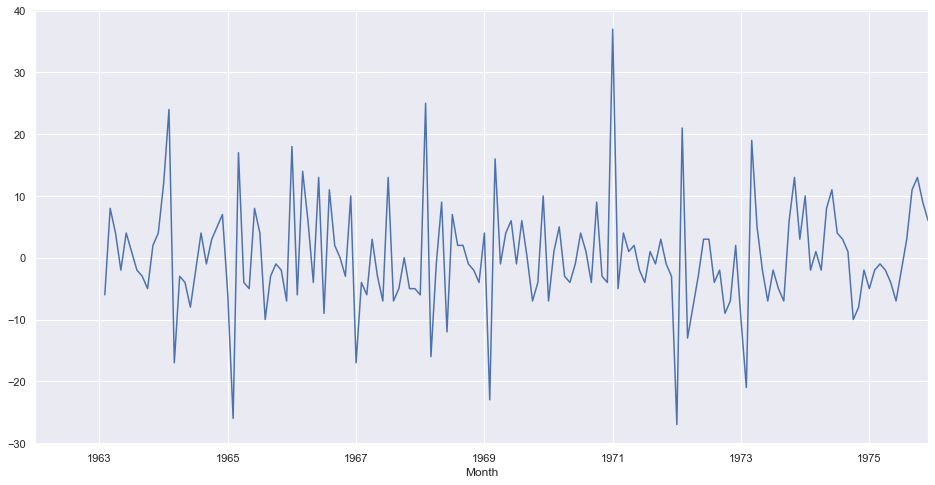

In [153]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot(figsize=(16,8))

In [154]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921986
p-value : 1.8654234318788024e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Figure size 432x288 with 0 Axes>

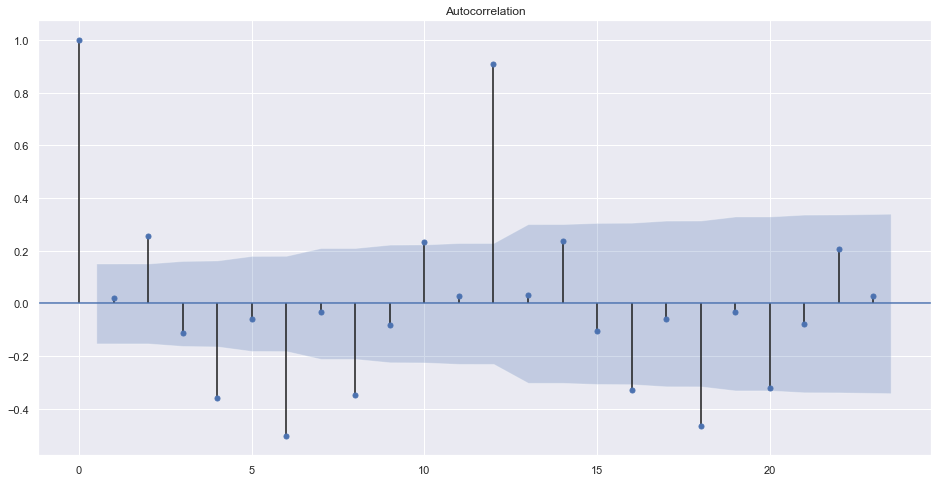

In [158]:
fig_first = plt.figure()
fig_first = plot_acf(df["Milk First Difference"].dropna())
fig_first.set_size_inches(16,8)

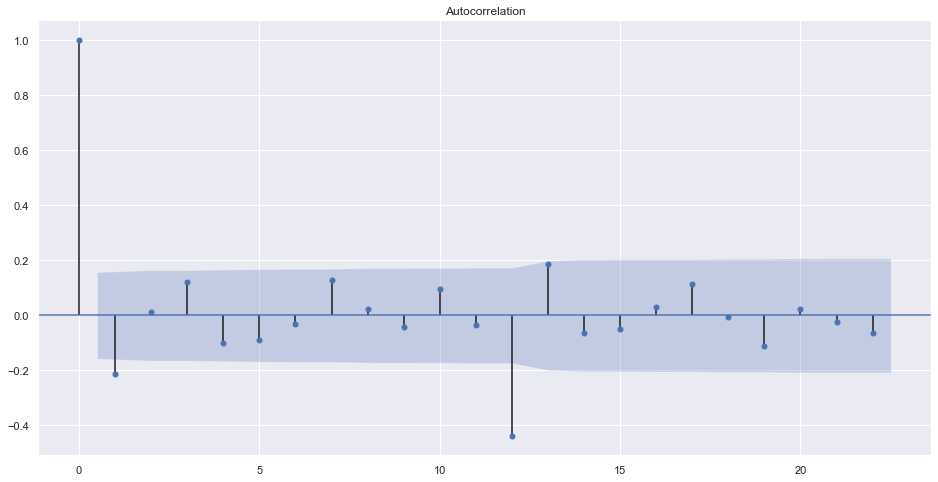

In [170]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())
fig_seasonal_first.set_size_inches(16,8)

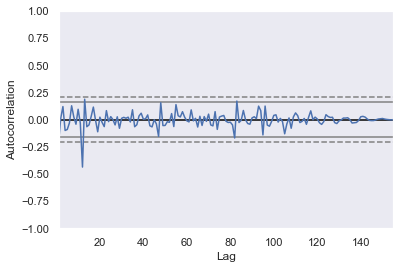

In [168]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

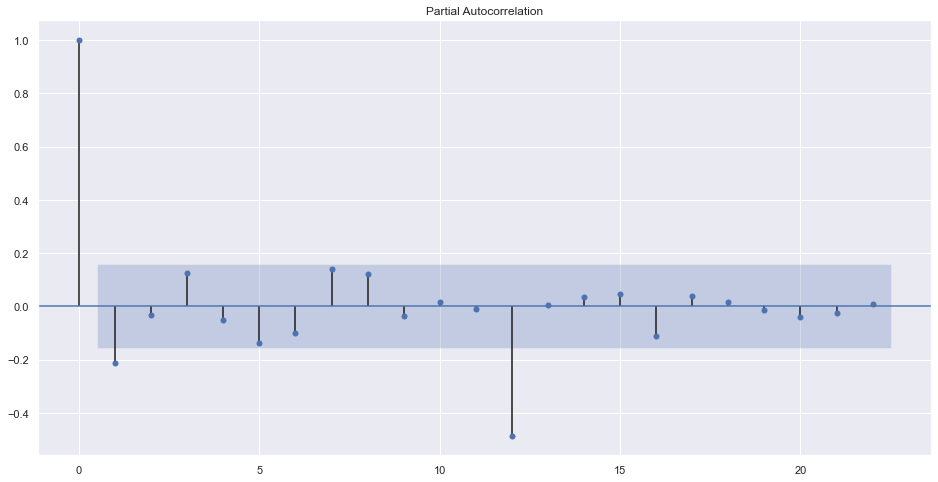

In [171]:
fig_seasonal_first = plot_pacf(df["Seasonal First Difference"].dropna())
fig_seasonal_first.set_size_inches(16,8)

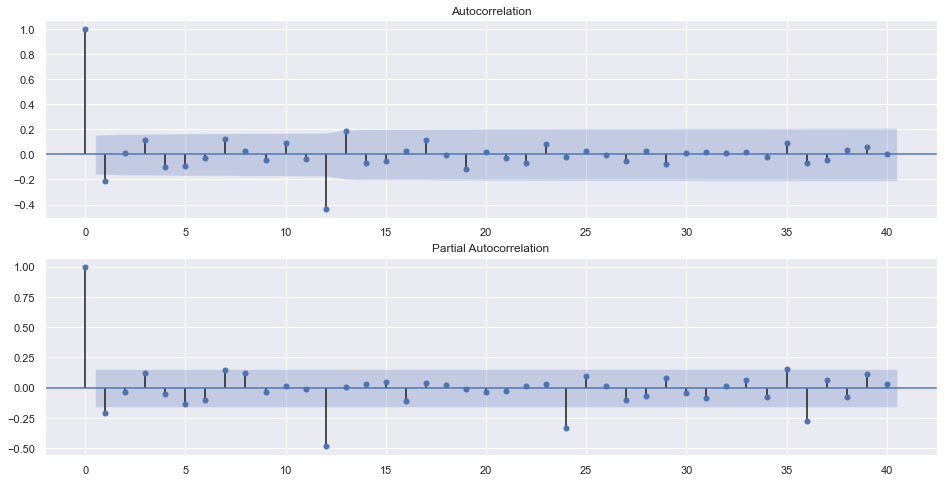

In [172]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [173]:
from statsmodels.tsa.arima_model import ARIMA

In [177]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 16 May 2020   AIC                           1074.131
Time:                                      12:17:44   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
            

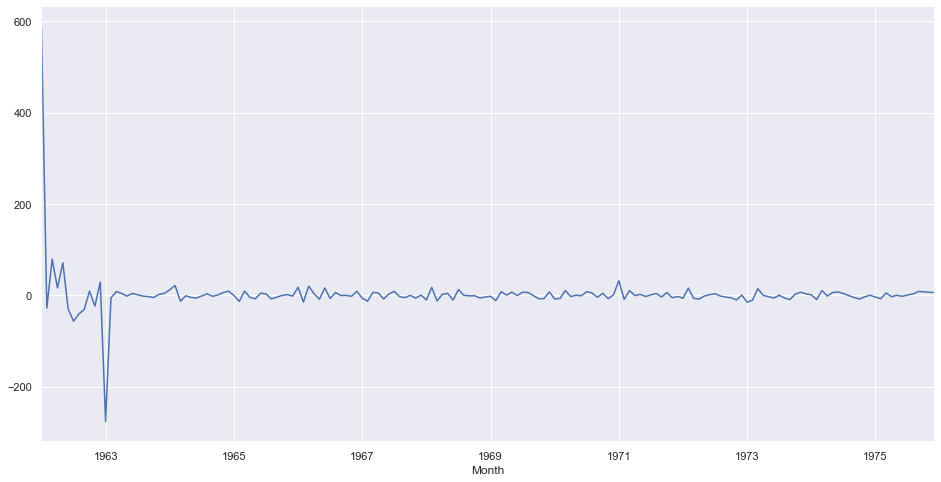

In [180]:
results.resid.plot(figsize=(16,8))

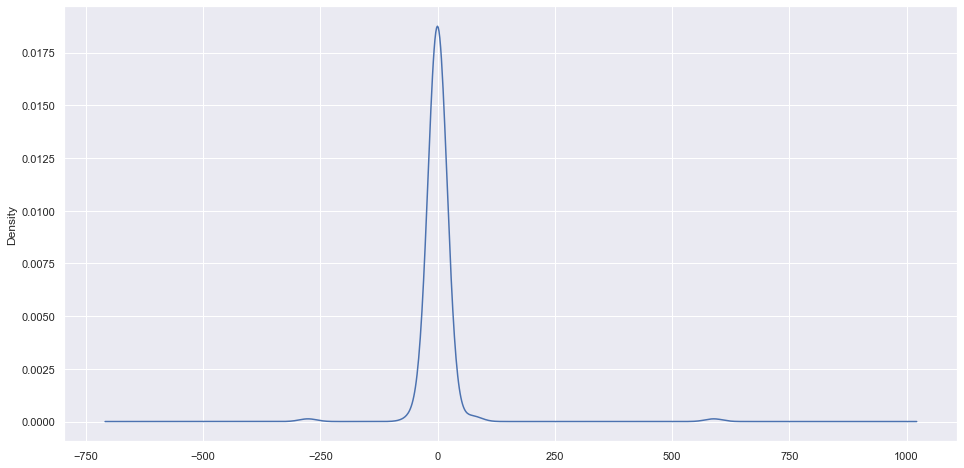

In [181]:
results.resid.plot(kind='kde', figsize=(16,8))

## Predictions

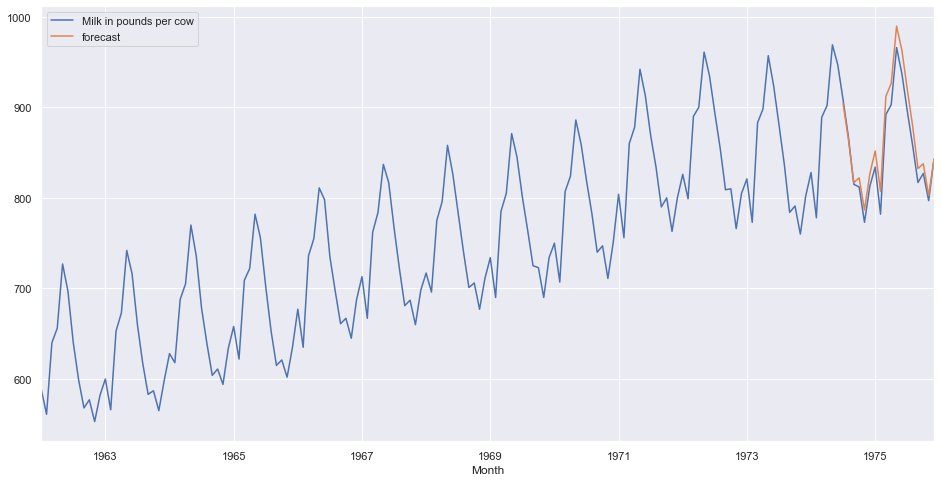

In [183]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot(figsize=(16,8))

In [184]:
from pandas.tseries.offsets import DateOffset

In [185]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [186]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [187]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [188]:
future_df = pd.concat([df,future_dates_df])

In [189]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


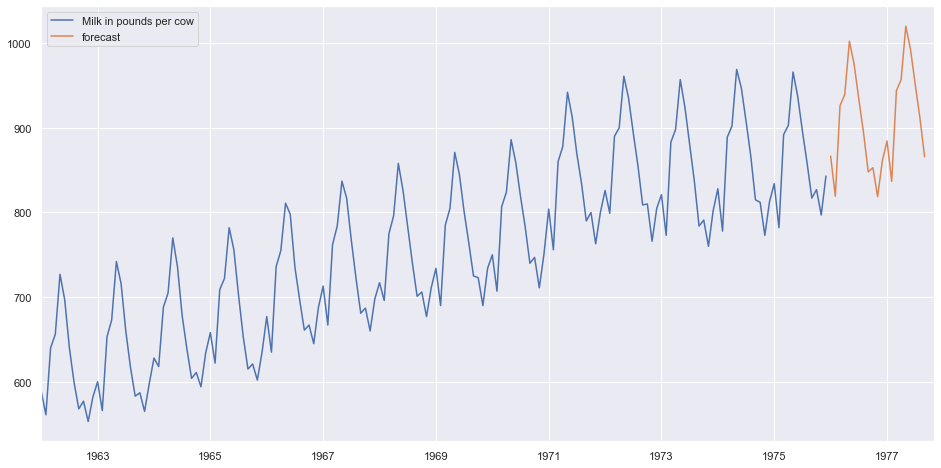

In [190]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(16, 8)) 